In [1]:
import pandas, numpy, seaborn, random

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40, 'font.family':'FreeSans', 'xtick.labelsize':40, 'ytick.labelsize':40, 'figure.figsize':(16,8)})

In [2]:
data_file = '/home/adrian/gd15/hi/research/huvec/data/TEER/TEER measurements without blank - Sheet1.tsv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file, sep='\t')
df

,ohms * cm2,replicate,condition,time
0,16.50,1,0 um cat,0
1,8.58,1,0 um cat,1
2,7.59,1,0 um cat,4
3,8.58,1,0 um cat,24
4,14.19,2,0 um cat,0
...,...,...,...,...
59,0.00,3,TNFa,24
60,15.84,4,TNFa,0
61,10.56,4,TNFa,1
62,7.92,4,TNFa,4


# 2. manipulate data

## 2.1. select control

In [4]:
treatment_labels = ['0 um cat', '0.5 um cat', '5 um cat', 'TNFa']
treatment_colors = ['black', 'orange', 'red', 'green']
time_points = [1, 4, 24]

In [5]:
plotting_values = []

for time_point in time_points:
    for i in range(len(treatment_labels)):  

        tl = treatment_labels[i]
        tc = treatment_colors[i]
        print(time_point, tl)

        sub = df[(df['condition'] == tl) & (df['time'] == time_point)]
        
        print(sub)
        
        v = sub['ohms * cm2'].values
        plotting_values.append(v)
        
        print('values', v, numpy.median(v))
        print('\n------------------') 

1 0 um cat
    ohms * cm2  replicate condition  time
1         8.58          1  0 um cat     1
5         8.58          2  0 um cat     1
9         8.25          3  0 um cat     1
13        8.91          4  0 um cat     1
values [8.58 8.58 8.25 8.91] 8.58

------------------
1 0.5 um cat
    ohms * cm2  replicate   condition  time
17        8.58          1  0.5 um cat     1
21        8.25          2  0.5 um cat     1
25       10.56          3  0.5 um cat     1
29        8.25          4  0.5 um cat     1
values [ 8.58  8.25 10.56  8.25] 8.415

------------------
1 5 um cat
    ohms * cm2  replicate condition  time
33        4.95          1  5 um cat     1
37        4.62          2  5 um cat     1
41        4.95          3  5 um cat     1
45        8.91          4  5 um cat     1
values [4.95 4.62 4.95 8.91] 4.95

------------------
1 TNFa
    ohms * cm2  replicate condition  time
49        8.58          1      TNFa     1
53        8.58          2      TNFa     1
57        7.59          3

# plotting

[8.58 8.58 8.25 8.91] [ 8.58  8.25 10.56  8.25]
	 2 orange 7.0 0.4396943295136487
[8.58 8.58 8.25 8.91] [4.95 4.62 4.95 8.91]
	 3 tab:red 3.5 0.11981952330399942
[8.58 8.58 8.25 8.91] [ 8.58  8.58  7.59 10.56]
	 4 tab:green 8.0 0.4388911401731174
[7.59 7.26 6.93 6.6 ] [7.92 8.58 8.58 5.28]
	 10 orange 4.0 0.15471203018232949
[7.59 7.26 6.93 6.6 ] [4.29 5.94 2.97 3.3 ]
	 11 tab:red 0.0 0.015191410988288745
		 SIGNIFICANT
[7.59 7.26 6.93 6.6 ] [5.28 7.26 7.92 7.92]
	 12 tab:green 5.5 0.2794928634206792
[8.58 4.95 6.6  5.94] [6.93 6.93 5.28 4.95]
	 18 orange 7.5 0.5
[8.58 4.95 6.6  5.94] [5.28 3.96 3.63 4.95]
	 19 tab:red 1.5 0.04071455117994554
		 SIGNIFICANT
[8.58 4.95 6.6  5.94] [0.99 1.98 0.   0.99]
	 20 tab:green 0.0 0.014700524095169821
		 SIGNIFICANT


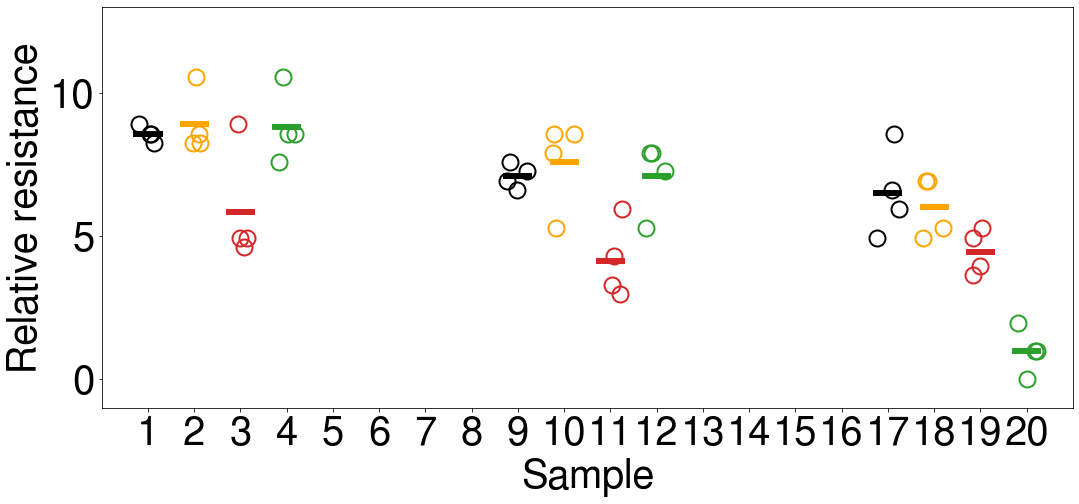

<Figure size 1152x576 with 0 Axes>

In [6]:
plotting_colors = ['black', 'orange', 'tab:red', 'tab:green', 'black', 'orange', 'tab:red', 'tab:green', 'black', 'orange', 'tab:red', 'tab:green']
epsi = 0.25
pos = 0
wide = epsi*2

for i in range(len(plotting_values)):
    pos = pos + 1
    
    # mean values
    mean = numpy.mean(plotting_values[i])
    matplotlib.pyplot.plot([pos-epsi, pos+epsi], [mean, mean], '-', color=plotting_colors[i], lw=6, zorder=999)
    
    # dot plots
    for element in plotting_values[i]:
        random_pos = (pos-epsi) + random.random()*wide
        matplotlib.pyplot.plot(random_pos, element, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor=plotting_colors[i])
        
    # closing
    matplotlib.pyplot.xticks(numpy.arange(1, 20+1))
    
    # hypothesis testing
    if plotting_colors[i] == 'black':
        background = plotting_values[i]

    if plotting_colors[i] != 'black':
        print(background, plotting_values[i])
        umws, pvalue = scipy.stats.mannwhitneyu(background, plotting_values[i])   
        print('\t', pos, plotting_colors[i], umws, pvalue)
        if pvalue < 0.01:
            print('\t\t VERY')
        if pvalue < 0.05:
            print('\t\t SIGNIFICANT')
    
    # adjust the blocks
    if (i+1)%4 == 0:
        pos = pos + 4
        
# # legend
# matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='black', label='EGM')
# matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='orange', label='0.5 uM')
# matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='tab:red', label='5 uM')
# matplotlib.pyplot.plot(-1, 0.95, 'o', markersize=16, markerfacecolor='None', markeredgewidth=2, markeredgecolor='tab:green', label='TNFa')

# matplotlib.pyplot.legend(loc=3, ncol=2)

matplotlib.pyplot.xlim(0, 21)
matplotlib.pyplot.ylim(-1, 13)

# end
matplotlib.pyplot.xlabel('Sample')
matplotlib.pyplot.ylabel('Relative resistance')

matplotlib.pyplot.tight_layout()

### these two lines are exclusive
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('permeability.svg')
### end of lines exclusivity

matplotlib.pyplot.clf()